In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#importacion de datos
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
train.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
train.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
train.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

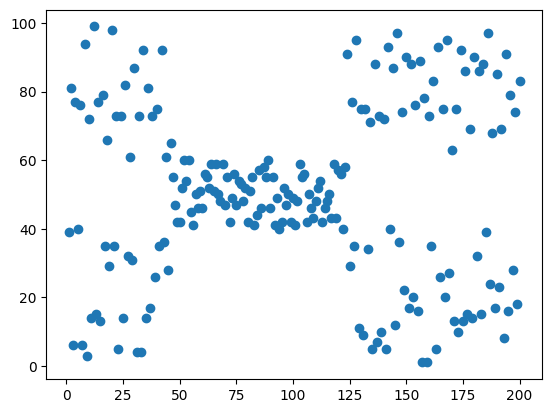

In [15]:
#analisis
plt.scatter(data=train,x='CustomerID',y='Spending Score (1-100)')

In [16]:

# Seleccionar solo las dos variables para clustering
X = train[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=5, random_state=101))])
pipe.fit(X)


,steps,"[('scaler', ...), ('kmeans', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300


In [17]:
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    print(f"k={k}, Silhouette Score={sil:.3f}")

k=2, Silhouette Score=0.387
k=3, Silhouette Score=0.467
k=4, Silhouette Score=0.494
k=5, Silhouette Score=0.555
k=6, Silhouette Score=0.457
k=7, Silhouette Score=0.454
k=8, Silhouette Score=0.456
k=9, Silhouette Score=0.459
k=10, Silhouette Score=0.459
k=11, Silhouette Score=0.449
k=12, Silhouette Score=0.450
k=13, Silhouette Score=0.409
k=14, Silhouette Score=0.394
k=15, Silhouette Score=0.385
k=16, Silhouette Score=0.397
k=17, Silhouette Score=0.393
k=18, Silhouette Score=0.397
k=19, Silhouette Score=0.397


In [18]:
# obtener el kmeans ajustado desde el pipeline (para mantener el nombre usado más abajo)
kmeans = pipe.named_steps['kmeans']
# obtener los centroides en el espacio escalado (resultado directo del kmeans)
centroids_scaled = kmeans.cluster_centers_
# transformar los centroides a la escala original (Annual Income, Spending Score)
centroids = pipe.named_steps['scaler'].inverse_transform(centroids_scaled)
# etiquetas de cluster
labels = kmeans.labels_
train['cluster'] = labels

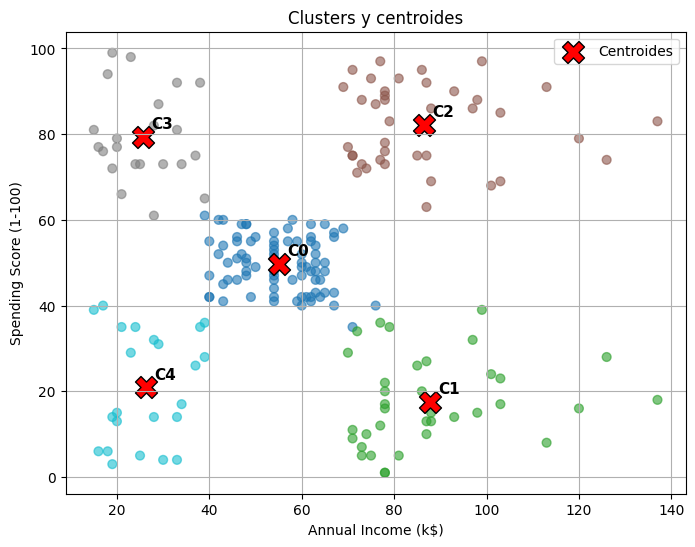

In [19]:
plt.figure(figsize=(8,6))
# puntos de datos coloreados por cluster
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],
            c=labels, cmap='tab10', s=40, alpha=0.6)

# centroides en escala original
plt.scatter(centroids[:, 0], centroids[:, 1],
            c='red', marker='X', s=250, edgecolor='k', label='Centroides')

# anotar cada centroide
for i, (cx, cy) in enumerate(centroids):
    plt.annotate(f'C{i}', xy=(cx, cy), xytext=(6, 6), textcoords='offset points',
                fontsize=11, fontweight='bold', color='black')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters y centroides')
plt.grid(True)
plt.legend()
plt.show()